# Module 02 - Part 01

Module 2 is a direct translation from R to Python based on the Advanced R tutorials (AdvanceR_Part1.Rmd) by Shao-Fang Wang in 2020, updated by Ben Prystawski in 2022. 

Many people have contributed to developing and revising the R tutorial material (which is what this Python tutorial is based on) over the years: 
Anna Khazenzon, Cayce Hook, Paul Thibodeau, Mike Frank, Benoit Monin, Ewart Thomas, Michael Waskom, Steph Gagnon, Dan Birman, Natalia Velez, Kara Weisman, Andrew Lampinen, Joshua Morris, Yochai Shavit, Jackie Schwartz, Arielle Keller, and Leili Mortazavi.   

### Welcome to part 1!

The first part of this module is designed to refresh what we covered in the previous session, as well as introduce a bit of new material. The second part of this module disusses ways to get help and introduces two types of statistical tests and how to run them in Python. This last part goes beyond the scope of PSYCH 251 but might be helpful as you work on your own data.

First we need to load some relevant libraries:

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

### A Reminder about DataFrames

In Python module01-03, we learned about DataFrames in pandas. Here's an example dataframe and some useful functions for investigating what's on the inside. Some of these basic functions for manipulating/exploring dataframes can be found in the [Python pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)!

In [43]:
x = [1,2,3,4,5]
y = [25,94,32,45,88]
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,1,25
1,2,94
2,3,32
3,4,45
4,5,88


### An interlude on Python data

Although it's possible to create a dataframe from scratch (as demonstrated above) in most cases you'll be reading data into Python that was created elsewhere. It's useful at this point to introduce two concepts that govern how Python thinks about accessing data. When dealing with data that are saved in a file somewhere on your computer, Python has the concept of the *working directory*. Any functions that read or write files to or from the disk will take as an argument a filename, and the filename you give should be a path relative to your working directory. You can check your current working directory using `os.getcwd()` function from the `os` library and change the working directory either by calling the `os.chdir()` function from the `os` library.

Assigning some value to a variable creates a new object in the *workspace*, which you can think of as Python's "working memory." Any object in the workspace can be immediately referenced in a line of code. You can open a pane in RStudio that will show you the name of every object in your workspace along with some information about those objects, and you can also get a vector of these names with the `locals()` function. To remove an object from your workspace, use the `del()` function.

A sidenote on data storage: Most of the data we'll be using is in *csv* format, which stands for "comma separated values." This is a plain-text format where commas divide columns and rows are placed on new lines. Because the data are stored as plain text, you can view (and edit) them in a basic text editor. The csv format is also advantageous relative to proprietary binary formats (like `.xlsx` or `.mat`) because pretty much any statistical application will contain routines to read and write these files.

In [44]:
import os

In [45]:
os.getcwd()

'/Users/ben/Documents/python-bootcamp/advanced'

#### Manipulating Dataframes
To begin, we'll load in a simple data file from a website for a previous rendition of PSYCH 252, and store it as a [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) named "df_survey".

This data file is called `fieldsimul1.csv`. Here, likely voters (*n* = 240) were surveyed, and report their age (`age`), and level of optimism (`optmism`), as well as other variables. **Is age related to optimism?**

We can load a dataframe directly from the internet by passing a URL to `pd.read_csv()`.

In [46]:
df_survey = pd.read_csv('https://raw.githubusercontent.com/lampinen/R_workshop_materials/master/data/fieldsimul1.csv')

Let's explore this data a bit to see what we'll be working with:

In [47]:
print(df_survey.head())
print(df_survey.describe())
print(df_survey.shape)

   recall  prop54  party  age  optmism  agecat  recallq
0       1       1      1   49        7      45        1
1       1       1      1   44        8      45        1
2       1       1      1   46        7      45        1
3       1       1      1   50        7      45        1
4       1       1      1   25        6      24        1
           recall      prop54       party        age     optmism      agecat  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     1.510000    1.785000    1.750000   48.32000    5.615000   48.120000   
std      0.584472    0.742652    0.741789   14.65474    1.922304   14.718996   
min      1.000000    1.000000    1.000000   20.00000    0.000000   24.000000   
25%      1.000000    1.000000    1.000000   37.00000    4.000000   35.000000   
50%      1.000000    2.000000    2.000000   48.00000    6.000000   45.000000   
75%      2.000000    2.000000    2.000000   58.00000    7.000000   57.000000   
max      3.000000    3.0

Here we can see that this **dataframe** is composed of 7 **variables** that each has 200 observations. In this case, each observation represents a different participant, and the 7 variables tell us information about that participant. As an example, let's look at all the information for participant 5 by looking at the 5th row of df_survey:

In [48]:
participant_num = 4
df_survey.loc[participant_num]

recall      1
prop54      1
party       1
age        25
optmism     6
agecat     24
recallq     1
Name: 4, dtype: int64

This shows us that participant 5 is 25 years old, and has an optimism score of 6.

### Integer vs. Factor

Now, we might want to treat some variables as qualitative, nominal **factors** rather than continuous, numeric **integers**. In Python, we must specify which variables to treat as factors if the **levels** (i.e., unique values) of the variable are composed of numbers instead of strings. Note that if the variable (e.g., "Subid") *levels* start with a letter (e.g., "subject1", "subject2") Python will automatically interpret the variable as a *factor*. If the variable levels start with a number (e.g., "1", "2"), Python will automatically interpret the variable as an *integer*. If you want the variable interpreted differently, you have to tell Python.

For instance, the variable "age" is continuous, but "agecat" is not. However, since the **levels** of "agecat" are indicated with numbers, we must tell Python to treat "agecat" as a factor:

In [6]:
df_survey['agecat'] = df_survey['agecat'].astype('category')

Now we can look at the structure of the df_survey dataframe again, to make sure agecat is now a factor:

In [8]:
df_survey['agecat'].dtype

CategoricalDtype(categories=[24, 35, 45, 57, 70], ordered=False)

### Plotting with seaborn

In this section we will introduce some plotting options that we did not cover in module 1. Again, the details of working with `seaborn` and `matplotlib` go beyond the requirements of PSYCH 251, but are useful skills to have. 

Some examples/code for plotting can be found on the [Plotting Examples page](https://seaborn.pydata.org/tutorial.html) of the seaborn website. Additional tips for plotting with the `seaborn` package can be found in the [Seaborn Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)! Additional tips for plotting with the `matplotlib` package can be found in the [Matplotlib Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf).

If you're starting in Module 2 directly we are using packages called `seaborn` and `matplotlib` for plotting. 
First, we load in the packages:

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='agecat', ylabel='age'>

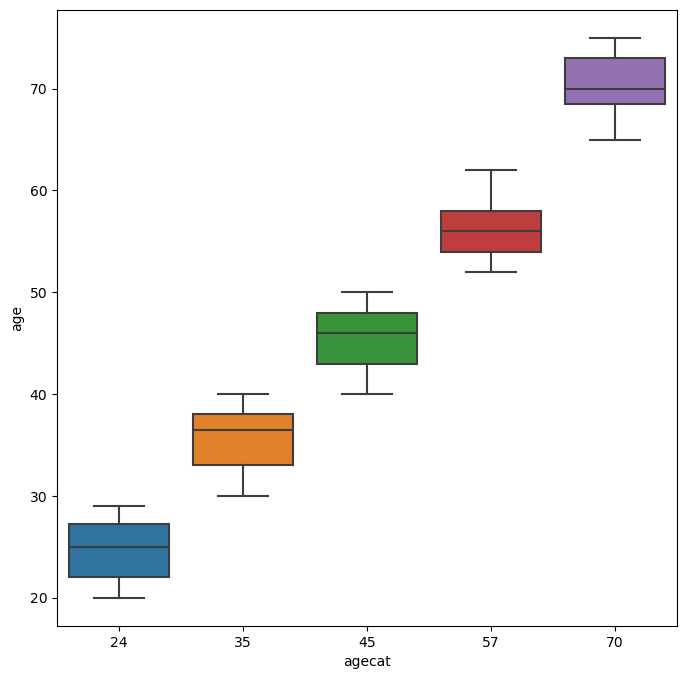

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x="agecat", y="age", data=df_survey)

### Creating factors from continuous variables

Suppose the variable "agecat" wasn't given to us, but we still wanted to group participants into categories based on their respective ages. Given the "age" variable, we can create a new categorical variable (i.e., **factor**) by specifying breaks at specific intervals:

In [49]:
# This would work, but is ugly and tedious to write
# for ig in df_survey['age']:
#     if (0<ig)&(ig<29):
#         temp.append(0)
#     if (ig>=29)&(ig<39):
#         temp.append(1)
#     if (ig>=39)&(ig<49):
#         temp.append(2)
#     if (ig>=49)&(ig<65):
#         temp.append(3)   
#     if (ig>=65):
#         temp.append(4)

In [50]:
# this is much nicer
temp = pd.cut(x=df_survey['age'], 
              bins=[0, 29, 39, 49, 59, 65], 
              labels=['0', '1', '2', '3', '4'])

In [51]:
df_survey['agecat0'] = temp
df_survey['agecat0'] = df_survey['agecat0'].astype('category')

In [52]:
df_survey.head()

,recall,prop54,party,age,optmism,agecat,recallq,agecat0
0,1,1,1,49,7,45,1,2
1,1,1,1,44,8,45,1,2
2,1,1,1,46,7,45,1,2
3,1,1,1,50,7,45,1,3
4,1,1,1,25,6,24,1,0


Specifically, these break points result in 5 age categories, 0:28, 29:38, 39:48, 49:64, and 65 and up. We can also visualize these groups:

<AxesSubplot:xlabel='agecat0', ylabel='age'>

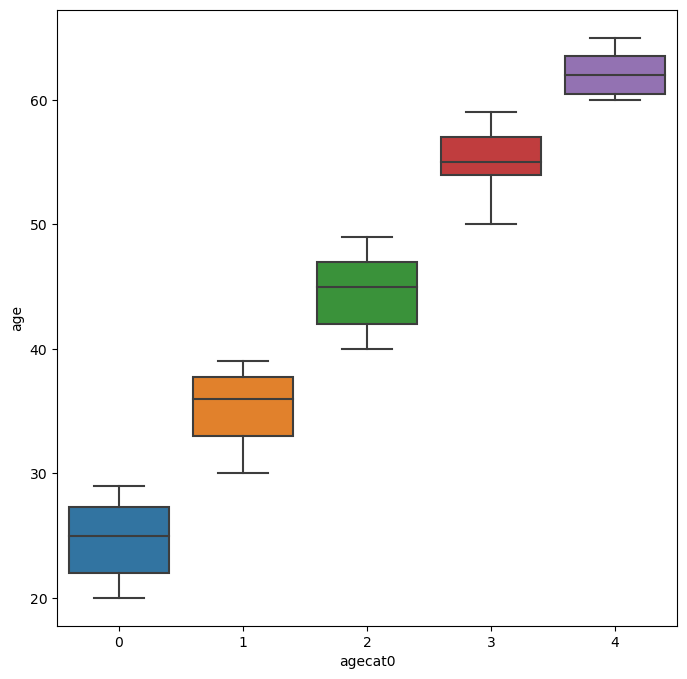

In [53]:
plt.figure(figsize=(8,8))
sns.boxplot(x="agecat0", y="age", data=df_survey)

Let's also take a look at plotting a histogram of the ages (`distplot()`). Here we are also setting the color of the bars as well as the title of the plot (`.set_title`). 

/var/folders/j2/m8twlxj12xdg_b0wm25qx_x40000gn/T/ipykernel_9862/821566023.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_survey['age'],kde=False,rug = True, bins = 30, color = 'orange').set_title('Distribution of Age')


Text(0.5, 1.0, 'Distribution of Age')

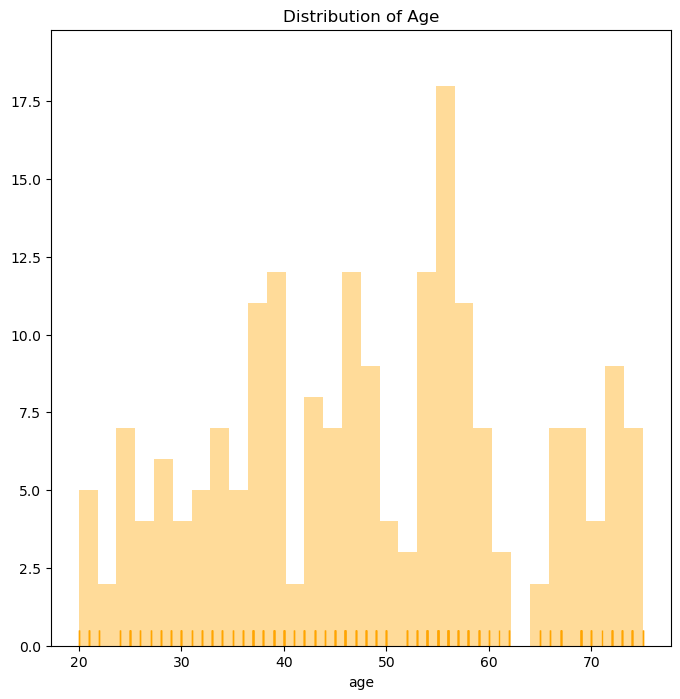

In [54]:
plt.figure(figsize=(8,8))
sns.distplot(df_survey['age'],kde=False,rug = True, bins = 30, color = 'orange').set_title('Distribution of Age')
#kde=False: remove density function that overlap with the histogram
#rug = True: add a rug plot, which draws a small vertical tick at each observation

Next, let's view a scatter plot of optimism by age. Before when we plotted the data, we were plotting a **factor** variable on the x-axis. As a result, boxplots were the logical way to view the data. However, if the x-axis variable is **continuous** (i.e., numeric), we would prefer a scatterplot.

We'll also add in a line to get a sense of the general trend of the data; here, we'll plot a linear regression line using ["lmplot"](https://seaborn.pydata.org/generated/seaborn.lmplot.html).


<Figure size 800x800 with 0 Axes>

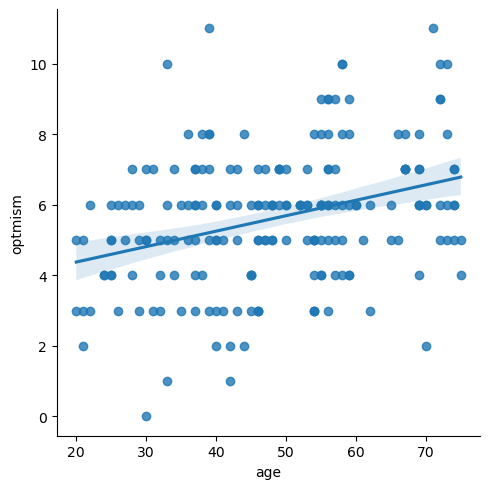

In [25]:
plt.figure(figsize=(8,8))
sns.lmplot(x='age',
           y='optmism',
           data=df_survey)

# Getting help

If you learn nothing else today, learn this: Search!
Search quickly, search often, and search in plain English (or your preferred non-computer language)! 

Use the internet!
-------------------
Don't know what function you should use to do a t-test? Google "t test Python", or "how do I do a t-test in Python?". Don't remember how to use `scipy.stats.chisquare()` function? Google "scipy.stats.chisquare() Python". Don't remember what a chi-squared test is? Google it, and read the Wikipedia page, and the Stackexchange discussion, and whatever weird PDFs you find online. Still getting an error message when you try to run the code? Google that error message, in quotes.

Every person using Python, and every person doing statistics, has a million questions as they are doing it - novices and experts alike. Luckily for all of us, many of our fellow Python and stats learners post their questions online, and other lovely people attempt to answer them publicly! We read somewhere that a prominent distinction between an experienced programmer and a novice is the longer latency for the novice to look up the help for something confusing (but the direction of causality is not clear!).

Use Python!
---------------
Another wonderful thing about working in Python is that there's actually a lot of help built right into Python. Almost all Python functions (more later on what those are) have help files built in that will provide you with useful information about what those functions do and how to use them. You find this by typing '?function', where I am using "function" as a stand-in for the name you actually want to know about (e.g., '?chisq.test' or '?t.test'). It's important to read these files closely the first time you encounter a function, but it's also (possibly more) important to refer to them **frequently**.

Getting Help Practice
------------------------

Here are several chunks of code that are broken. Fix them!! What tools are available to help you use to do this? We've included a note under each chunk about what we were **trying** to do :).

Note: you need to uncomment (remove the #) the commented lines, otherwise they won't crash :).

##### Problem 01

In [ ]:
?np.arange

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interva

In [27]:
x = np.arange(25,90)
x[90]

IndexError: index 90 is out of bounds for axis 0 with size 65

(The goal was to get the last element of x)
##### Problem 02

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='age',
                y='recallq',
                data=df)

ValueError: Could not interpret value `age` for parameter `x`

<Figure size 800x800 with 0 Axes>

(We wanted a scatterplot of age against responses to the recall question)
##### Problem 03

In [ ]:
d = {'label':["ENS1","ENS2","ENS3","ENS4"],
     'hsp44':[0,2,1,0],
     'mus':[25,np.nan,np.nan,44]}

example = pd.DataFrame(d)
example.head()

,label,hsp44,mus
0,ENS1,0,25.0
1,ENS2,2,NaN
2,ENS3,1,NaN
3,ENS4,0,44.0


<AxesSubplot:xlabel='mus', ylabel='hsp44'>

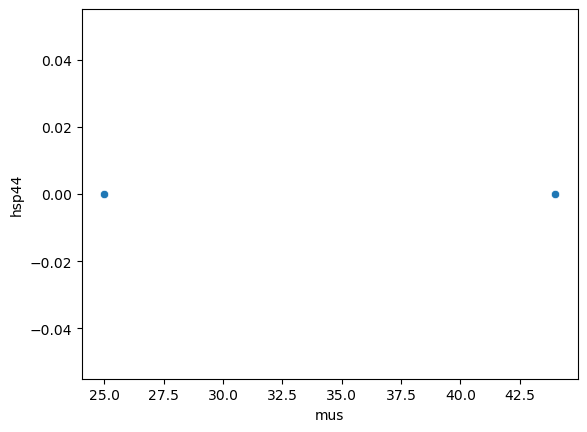

In [ ]:
sns.scatterplot(x = 'mus',
                    y = 'hsp44', 
                    data = example)

(We wanted to include the rows with mus=NA in our plot, but set mus=0 for those values)

# Statistical Tests - Not (necessarily) required for PSYCH 251

*note*- The materials in this section go beyond the mandatory material in our first course in the stats sequence. However, having some familiarty with them might help with the project for the class, and/or may make it easier to work with your own data later on. This section also combines what we've learned so far and implements it in the context of data analysis. 

So far, we have learned how to use graphs and plots to get an idea about possible patterns in our data (such as- relationships between variables and differences between groups). However, the fact that something *looks like* a pattern doen't necessarily mean that there is indeed a pattern. For the most part we test whether patterns are statistically significant through *parametric* null hypothesis testing. There are other methods that are gaining prominance within psychology (such as Bayesian analysis and nonparametric methods), but we will not deal with them here. Chances are that the studies you will encounter in PSYCH 251 used some type of parametric test. 

We will not get into the details of hypothesis testing in this tutorial, and will quickly introduce two  widely used methods: t-test and linear regression. 

T-tests
------------
A basic and widely used procedure is the [student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) (read the Wikipedia entery for the interesting story behind the test's name). This is a test to compare the **means** of two groups (either independent or not -- such as in the case of repeated measures). In this test, we are interested in the standardized difference (the **t-statistic**) between two groups (or samples of data). This test *typically* assumes that the distribution of scores in our two populations of interest is normal, and that the two samples have similar (homogeneous) variance. 

We will use our data (df_survey) to go through the steps of a *two-samples* t-test. We are curious whether voters for one party are older than voters for another party. Our dataset has a variable for party affiliation ("party"), but it has 3 parties and we are interested in two parties only: Democrat (denoted with-1) and Republican (denoted with-2). 

First, use what you've learned so far to create a dataset with only Democrats and Republicans. 

In [36]:
# Select only Democrats and Republicans. 
#Instead of removing observasions from the existing dataset, try to create a different dataset named 'df_dr' that includes only the observations of interest. 


# My answer:
df_dr=df_survey[df_survey['party'].isin([1,2])]

# 'Sanity' check:
#numpy.unique(df_dr['party'])

In [37]:
df_dr['party']=df_dr['party'].astype('category')
df_dr['party'].dtype

/var/folders/j2/m8twlxj12xdg_b0wm25qx_x40000gn/T/ipykernel_9862/3294584327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dr['party']=df_dr['party'].astype('category')


CategoricalDtype(categories=[1, 2], ordered=False)

Try plotting the ages in the two groups in an informative way (there is more than one option). 
*note*- There are advantages and disadvantages to plotting data prior to analysis. We will likely discuss them in 251.


<AxesSubplot:xlabel='party', ylabel='age'>

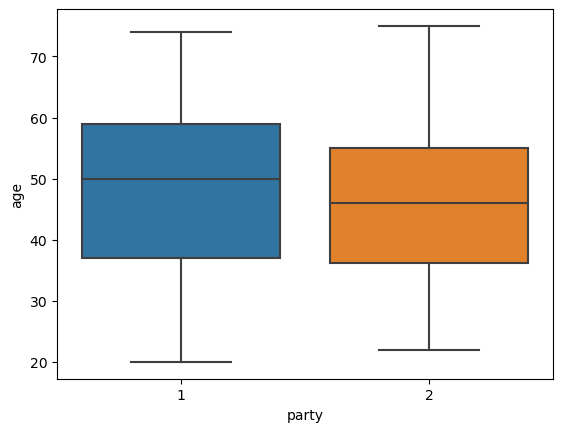

In [38]:
sns.boxplot(x = 'party',
            y = 'age',
            data = df_dr)

In [1]:
##Apply your knowledge
#Can you plot the same information using bar plots? 




In order to formally test whether there is sufficient evidence for a difference between the mean age in each group we need to run a t-test. This is done with function [`sm.stats.ttest_ind`](https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html). 

In [39]:
part1_age = df_dr['age'][df_dr['party']==1]
part2_age = df_dr['age'][df_dr['party']==2]
sm.stats.ttest_ind(part1_age,part2_age)
#default: two sided

(0.9512227414479183, 0.34290832936009263, 162.0)

From this output we learn that the mean age in the 'Democrat' group is 48.31 and in the 'Republican' group it is 46.21. We also learn that the difference between the two means is *not* statistically significant: the p-value is 0.34 (rounded). 

By default, the `sm.stats.ttest_ind` function is assuming we are interested in a *two-tail test* and assumes that the variance of age in the two groups is homogeneous. We can specify a one-tailed test (if we are only interested in knowing whether republicans are older for example) by using 'alternative=' and we can choose to assume unequal varaince in the two groups using `usevar = 'unequal'`. 

Let's try this:

In [40]:
sm.stats.ttest_ind(part1_age,part2_age,
                   alternative = 'smaller',#H1 difference in means smaller than value
                   usevar = 'unequal')
#returns: t test statistic, pvalue, and df

(0.9633102912982132, 0.8315674209298591, 157.8590618416372)

we specify `alternative="smaller"` because we think the first group's mean age (in this case- Democrats) is less than that of the second group.

Our output now looks quite different! Though the means are naturally the same, the p-value is much larger (this is because our results are in the "wrong" direction to our hypothesis).

In [56]:
#Apply your knowledge
#Run the appropriate t-test

part1_opt = df_dr['optmism'][df_dr['party']==1]
part2_opt = df_dr['optmism'][df_dr['party']==2]
sm.stats.ttest_ind(part1_opt,part2_opt,alternative = 'larger')#H1 difference in means larger than value)
#returns: t test statistic, pvalue, and df

(6.679416407727416, 1.8275052763710466e-10, 162.0)

What is your conclusion? Do we have evidence that Democrats are more optimistic than Republicans?
